In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [4]:
dataset = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()
x_train.shape
x_train, x_test = x_train/255, x_test/255


170498071/170498071 [==============================] - 6s 0us/step


In [5]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation="relu"),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(64, (2,2)),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(32, activation="relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation="sigmoid")
])

In [6]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.01)

In [7]:
from tensorflow.python import metrics
model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics="accuracy")
                                                                  

In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=2000, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 10s 68ms/step - loss: 2.3101 - accuracy: 0.1065 - val_loss: 2.2928 - val_accuracy: 0.1105
Epoch 2/100
25/25 [==============================] - 1s 53ms/step - loss: 2.2913 - accuracy: 0.1238 - val_loss: 2.2823 - val_accuracy: 0.1677
Epoch 3/100
25/25 [==============================] - 1s 54ms/step - loss: 2.2829 - accuracy: 0.1396 - val_loss: 2.2722 - val_accuracy: 0.1742
Epoch 4/100
25/25 [==============================] - 1s 52ms/step - loss: 2.2733 - accuracy: 0.1527 - val_loss: 2.2593 - val_accuracy: 0.1820
Epoch 5/100
25/25 [==============================] - 1s 52ms/step - loss: 2.2621 - accuracy: 0.1611 - val_loss: 2.2459 - val_accuracy: 0.1883
Epoch 6/100
25/25 [==============================] - 1s 53ms/step - loss: 2.2519 - accuracy: 0.1699 - val_loss: 2.2327 - val_accuracy: 0.1946
Epoch 7/100
25/25 [==============================] - 1s 53ms/step - loss: 2.2400 - accuracy: 0.1732 - val_loss: 2.2184 - val_accuracy: 0.2047
Epoch 8/100
25/25

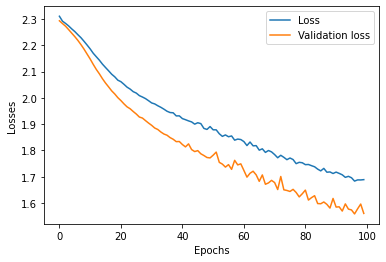

In [13]:
plt.figure()
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()


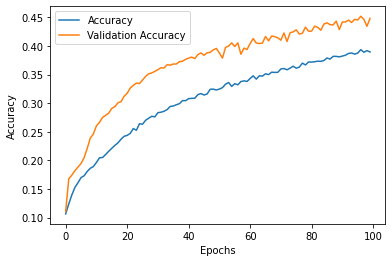

In [15]:
plt.figure()
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()